<a href="https://colab.research.google.com/github/rwswzk/BusinessOOP/blob/main/JNS_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questions to answer:

1. Top five/ten most likely areas(region/country) for attack?

2. What time day/month/year do attacks occur?

3. How far from shore to avoid attack?

In [ ]:
# Suppress output
%%capture
if 'google.colab' in str(get_ipython()):  # Check if running in Google Colab
    # Install required system libraries
    !apt install libspatialindex-dev
    # Install required Python packages
    !pip install fiona shapely pyproj rtree mapclassify
    !pip install geopandas
    !pip install openpyxl
    !pip install leafmap
    !pip install kaggle
    # Create a directory for storing Kaggle API key
    !mkdir ~/.kaggle

In [ ]:
import os                           # Import the os module for operating system functionality
import re                           # Import the re module for regular expressions
import pandas as pd                # Import the pandas library for data manipulation
import geopandas as gpd            # Import the geopandas library for working with geospatial data
import leafmap.foliumap as leafmap # Import the leafmap library for creating interactive maps
import matplotlib.pyplot as plt    # Import the matplotlib.pyplot module for plotting
import seaborn as sns              # Import the seaborn library for statistical data visualization


In [ ]:
data_folder = 'data'         # Define the name of the data folder
output_folder = 'output'     # Define the name of the output folder

# Check if the data folder does not exist, and create it if it doesn't
if not os.path.exists(data_folder):
    os.mkdir(data_folder)

# Check if the output folder does not exist, and create it if it doesn't
if not os.path.exists(output_folder):
    os.mkdir(output_folder)


In [ ]:
#Go to your Kaggle account, navigate to 'Account' > 'Create New API Token'.
#This will download a file named kaggle.json containing your API credentials.

# Import the files module from google.colab library for uploading files
from google.colab import files
# Upload the kaggle.json file
files.upload()
# Copy the uploaded kaggle.json file to the ~/.kaggle/ directory
!cp kaggle.json ~/.kaggle/
# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json
# Download the dataset using the Kaggle API
!kaggle datasets download -d n0n5ense/global-maritime-pirate-attacks-19932020
# Import the zipfile module
import zipfile
# Extract the contents of the downloaded zip file to the 'data' directory
with zipfile.ZipFile('/content/global-maritime-pirate-attacks-19932020.zip', 'r') as zip_ref:
    zip_ref.extractall('data')


KeyboardInterrupt: 

In [ ]:
excel_file_1 = 'pirate_attacks.csv'
excel_file_1_path = os.path.join(data_folder, excel_file_1)
raw_df = pd.read_csv(excel_file_1_path)
raw_df

,date,time,longitude,latitude,attack_type,location_description,nearest_country,eez_country,shore_distance,shore_longitude,shore_latitude,attack_description,vessel_name,vessel_type,vessel_status,data_source
0,1993-01-02,NaN,116.966700,19.700000,NaN,Hong Kong - Luzon - Hainan,CHN,TWN,357.502373,115.825956,22.746644,NaN,Mv Cosmic Leader,NaN,NaN,mappingpiracy
1,1993-01-04,NaN,116.000000,22.350000,NaN,Hong Kong - Luzon - Hainan,CHN,CHN,47.431573,115.825956,22.746644,NaN,Mv Tricolor Star III,NaN,NaN,mappingpiracy
2,1993-01-06,NaN,115.250000,19.670000,NaN,Hong Kong - Luzon - Hainan,CHN,TWN,280.811871,114.302501,22.044867,NaN,Mv Arktis Star,NaN,NaN,mappingpiracy
3,1993-01-08,NaN,124.583300,29.900000,NaN,East China Sea,CHN,CHN,209.923396,122.409679,29.911200,NaN,Ussurijsk,NaN,NaN,mappingpiracy
4,1993-01-12,NaN,120.266700,18.133333,NaN,Hong Kong - Luzon - Hainan,PHL,PHL,22.027332,120.470063,18.091010,NaN,Mv Chennai Nermai,NaN,NaN,mappingpiracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,2020-12-15,02:15 UTC,4.751944,2.000833,Boarded,Around 165nm SSW of Brass,STP,STP,269.439937,6.497813,0.312690,15.12.2020: 0215 UTC: Posn: 02:00.3N - 004:45....,NaN,Product Tanker,NaN,imb
7507,2020-12-19,13:36 UTC,6.169167,2.602222,Boarded,Around 100nm South of Brass,STP,STP,168.407993,7.371837,1.677191,19.12.2020: 1336 UTC: Posn: 02:36.8N – 006:10....,NaN,Container,NaN,imb
7508,2020-12-21,04:09 UTC,5.616667,2.616667,Boarded,"Around 107nm SSW of Brass, Nigeria",NGA,NGA,191.182791,6.112804,4.272162,"21.12.2020: 0409 UTC: Posn : 02:37N – 005:37E,...",NaN,Container,NaN,imb
7509,2020-12-26,01:30 UTC,-1.683333,4.883333,Boarded,Takoradi Anchorage,GHA,GHA,6.288180,-1.718821,4.927680,26.12.2020: 0130 UTC: Posn: 04:53.51N – 001:41...,NaN,General Cargo,Anchored,imb


In [ ]:
# Define the path to the country codes CSV file
excel_file_2 = 'country_codes.csv'
excel_file_2_path = os.path.join(data_folder, excel_file_2)

# Read the country codes CSV file into a DataFrame
codes_df = pd.read_csv(excel_file_2_path)

# Reset the index of the DataFrame
codes_df = codes_df.reset_index()

# Reindex the DataFrame starting from 1
codes_df = codes_df.reindex(range(1, len(codes_df) + 1))

# Drop the last row of the DataFrame
codes_df.drop(codes_df.index[-1], inplace=True)

# Convert the 'index' column to integer type
codes_df['index'] = codes_df['index'].astype(int)

# Display the updated DataFrame
codes_df

,index,country,region,country_name
1,1,AFG,South Asia,Afghanistan
2,2,AGO,Sub-Saharan Africa,Angola
3,3,ALB,Europe & Central Asia,Albania
4,4,AND,Europe & Central Asia,Andorra
5,5,ARE,Middle East & North Africa,United Arab Emirates
...,...,...,...,...
212,212,XKX,Europe & Central Asia,Kosovo
213,213,YEM,Middle East & North Africa,"Yemen, Rep."
214,214,ZAF,Sub-Saharan Africa,South Africa
215,215,ZMB,Sub-Saharan Africa,Zambia


In [ ]:
# Drop columns from raw_df that are not needed for Q_1_clean_df
Q_1_clean_df = raw_df.drop(["attack_description", "attack_type","vessel_name","vessel_type","vessel_status", "data_source","shore_longitude", "shore_latitude", "eez_country", "location_description", "longitude", "latitude", "time"], axis=1)

# Reset the index of Q_1_clean_df
Q_1_clean_df = Q_1_clean_df.reset_index()

# Reindex Q_1_clean_df starting from 1
Q_1_clean_df = Q_1_clean_df.reindex(range(1, len(Q_1_clean_df) + 1))

# Drop the last row of Q_1_clean_df
Q_1_clean_df.drop(Q_1_clean_df.index[-1], inplace=True)

# Convert the 'index' column to integer type
Q_1_clean_df['index'] = Q_1_clean_df['index'].astype(int)

# Convert the 'date' column to datetime format
Q_1_clean_df['date'] = pd.to_datetime(Q_1_clean_df['date'])

# Display the updated Q_1_clean_df
Q_1_clean_df


,index,date,nearest_country,shore_distance
1,1,1993-01-04,CHN,47.431573
2,2,1993-01-06,CHN,280.811871
3,3,1993-01-08,CHN,209.923396
4,4,1993-01-12,PHL,22.027332
5,5,1993-01-13,KHM,184.796641
...,...,...,...,...
7506,7506,2020-12-15,STP,269.439937
7507,7507,2020-12-19,STP,168.407993
7508,7508,2020-12-21,NGA,191.182791
7509,7509,2020-12-26,GHA,6.288180


In [ ]:
# Iterate over each row in Q_1_clean_df
for index, row in Q_1_clean_df.iterrows():
    # Get the country code from the 'nearest_country' column
    country_code = row['nearest_country']

    # Find the corresponding country name in codes_df
    country_name_values = codes_df.loc[codes_df['country'] == country_code, 'country_name'].values

    # If a country name is found, update the 'nearest_country' column in Q_1_clean_df
    if len(country_name_values) > 0:
        country_name = country_name_values[0]
        Q_1_clean_df.at[index, 'nearest_country'] = country_name
    # If no country name is found, set 'nearest_country' to 'Unknown'
    else:
        Q_1_clean_df.at[index, 'nearest_country'] = 'Unknown'

# Display the updated Q_1_clean_df
Q_1_clean_df

,index,date,nearest_country,shore_distance
1,1,1993-01-04,China,47.431573
2,2,1993-01-06,China,280.811871
3,3,1993-01-08,China,209.923396
4,4,1993-01-12,Philippines,22.027332
5,5,1993-01-13,Cambodia,184.796641
...,...,...,...,...
7506,7506,2020-12-15,São Tomé and Principe,269.439937
7507,7507,2020-12-19,São Tomé and Principe,168.407993
7508,7508,2020-12-21,Nigeria,191.182791
7509,7509,2020-12-26,Ghana,6.288180


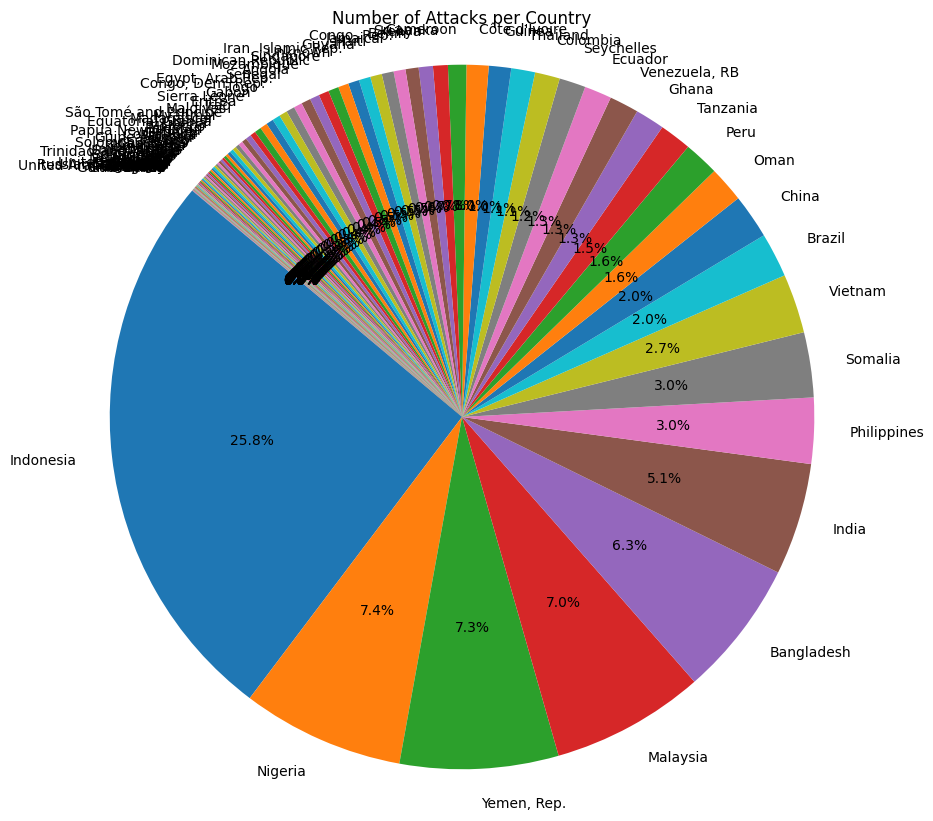

In [ ]:
# Calculate the number of attacks per country
country_attacks = Q_1_clean_df['nearest_country'].value_counts()

# Plot the number of attacks per country as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(country_attacks, labels=country_attacks.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Attacks per Country')
plt.axis('equal')

plt.show()

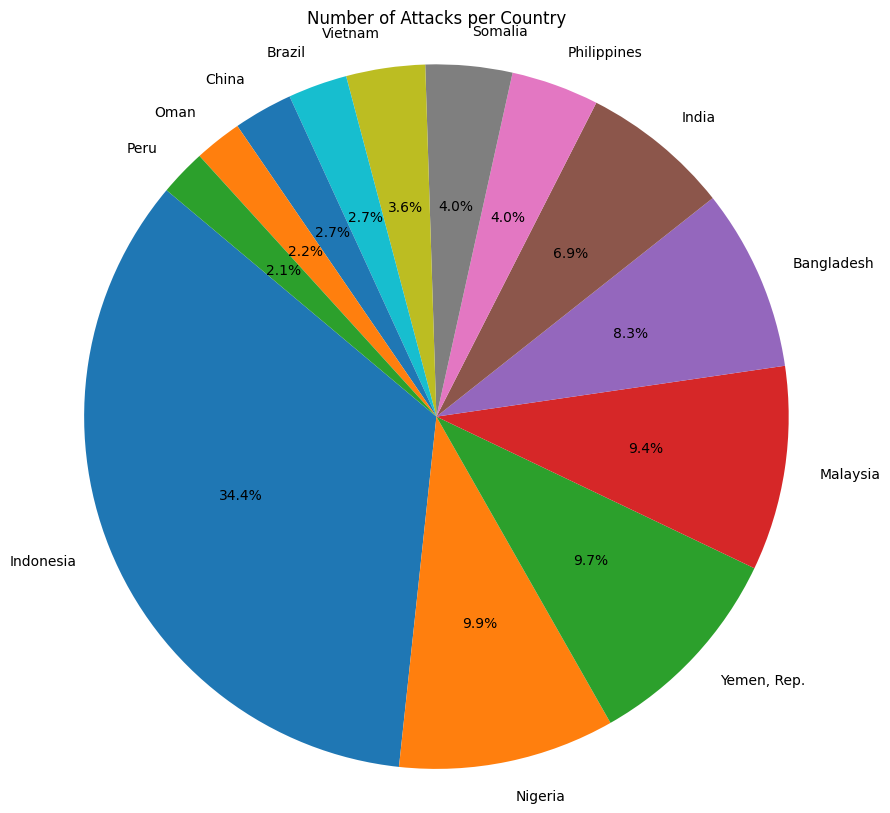

In [ ]:
# Calculate the number of attacks per country
country_attacks = Q_1_clean_df['nearest_country'].value_counts()

# Filter out countries with less than 1.5% of attacks
threshold = 0.015  # 1.5%
filtered_countries = country_attacks[country_attacks / country_attacks.sum() >= threshold]

# Plot the number of attacks per country as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(filtered_countries, labels=filtered_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Attacks per Country')
plt.axis('equal')

plt.show()

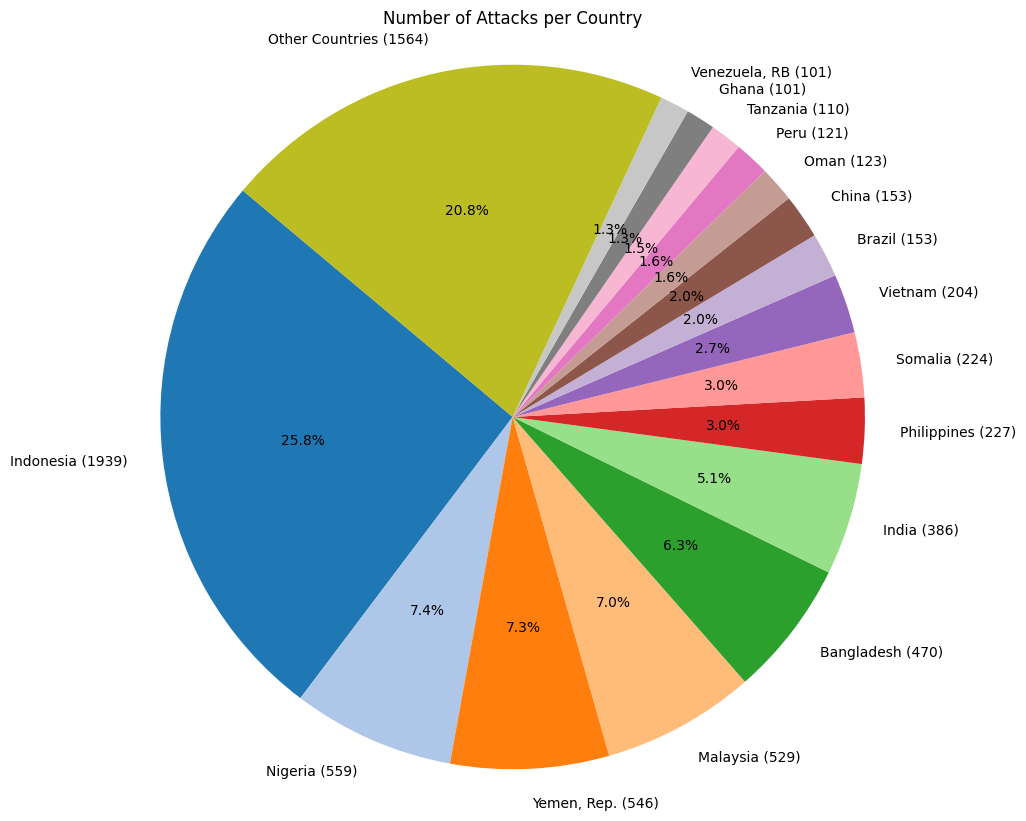

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of attacks per country
country_attacks = Q_1_clean_df['nearest_country'].value_counts()

# Calculate the total number of attacks
total_attacks = country_attacks.sum()

# Filter out countries with less than 1.3% of attacks
threshold = 0.013  # 1.3%
filtered_countries = country_attacks[country_attacks / total_attacks >= threshold]
other_countries_attacks = total_attacks - filtered_countries.sum()
other_countries_count = len(country_attacks) - len(filtered_countries) + 1

# Create a new series with the filtered countries and "Other Countries"
final_countries = filtered_countries.append(pd.Series([other_countries_attacks], index=['Other Countries']))

# Define a color palette with enough unique colors
colors = sns.color_palette('tab20', n_colors=len(final_countries))

# Plot the number of attacks per country as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(final_countries, labels=[f'{country} ({count})' for country, count in final_countries.iteritems()], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Number of Attacks per Country')
plt.axis('equal')

plt.show()


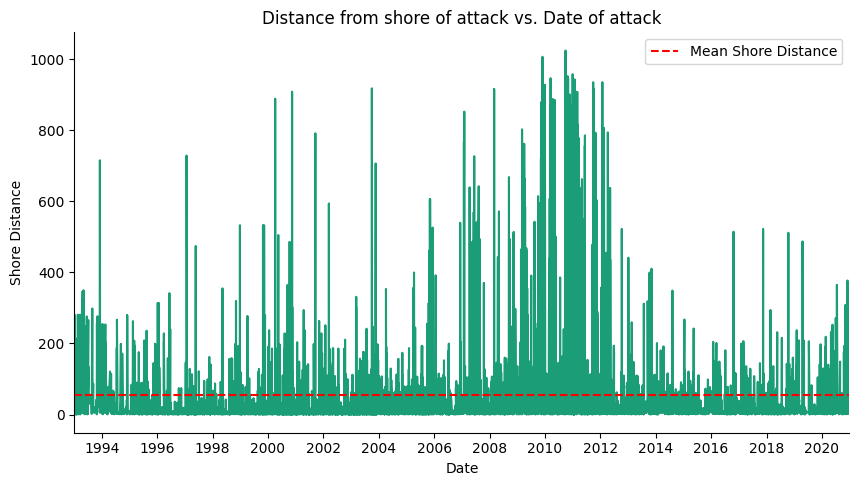

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Calculate the mean shore distance
mean_shore_distance = Q_1_clean_df['shore_distance'].mean()

plt.figure(figsize=(10, 5.2))
palette = list(sns.palettes.mpl_palette('Dark2'))

df_sorted = Q_1_clean_df.sort_values('date', ascending=True)
xs = df_sorted['date']
ys = df_sorted['shore_distance']

plt.plot(xs, ys, label='', color=palette[0])

# Set the x-axis major locator to every two years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlim(Q_1_clean_df['date'].min(), Q_1_clean_df['date'].max())

# Add a mean shore distance line
plt.axhline(y=mean_shore_distance, color='r', linestyle='--', label='Mean Shore Distance')

sns.despine()
plt.xlabel('Date')
plt.ylabel('Shore Distance')
plt.title('Distance from shore of attack vs. Date of attack')
plt.legend()
plt.show()

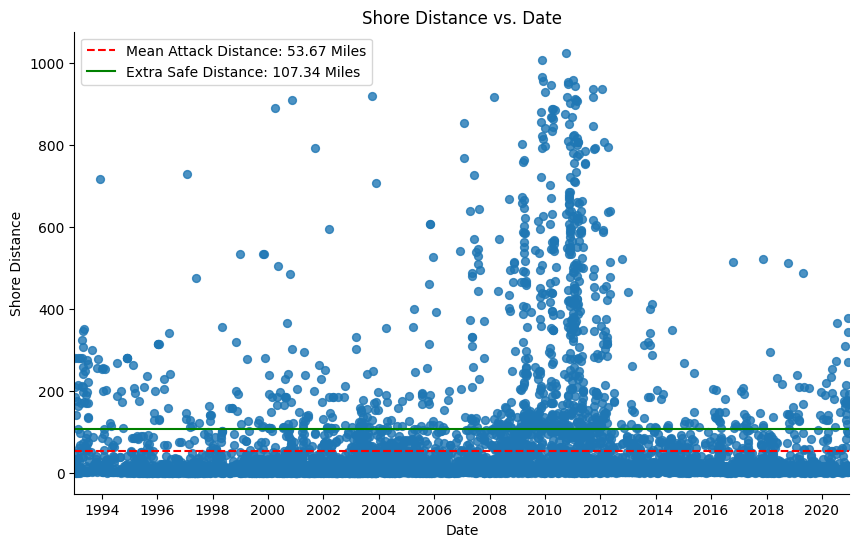

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# Calculate the mean shore distance
mean_shore_distance = Q_1_clean_df['shore_distance'].mean()
mean_shore_distance_2x = mean_shore_distance * 2

# Assuming Q_1_clean_df is your DataFrame containing 'date' and 'shore_distance' columns
plt.figure(figsize=(10, 6))
plt.scatter(Q_1_clean_df['date'], Q_1_clean_df['shore_distance'], s=32, alpha=0.8)
plt.gca().spines[['top', 'right']].set_visible(False)

# Change the scale of the date axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set x-axis limits to start and end on data points
plt.xlim(Q_1_clean_df['date'].min(), Q_1_clean_df['date'].max())

# Add a mean shore distance line with the mean value in the label
plt.axhline(y=mean_shore_distance, color='r', linestyle='--', label=f'Mean Attack Distance: {mean_shore_distance:.2f} Miles')
plt.axhline(y=mean_shore_distance_2x, color='g', linestyle='-', label=f'Extra Safe Distance: {mean_shore_distance_2x:.2f} Miles')

plt.xlabel('Date')
plt.ylabel('Shore Distance')
plt.title('Shore Distance vs. Date')

# Display the legend
plt.legend()

plt.show()

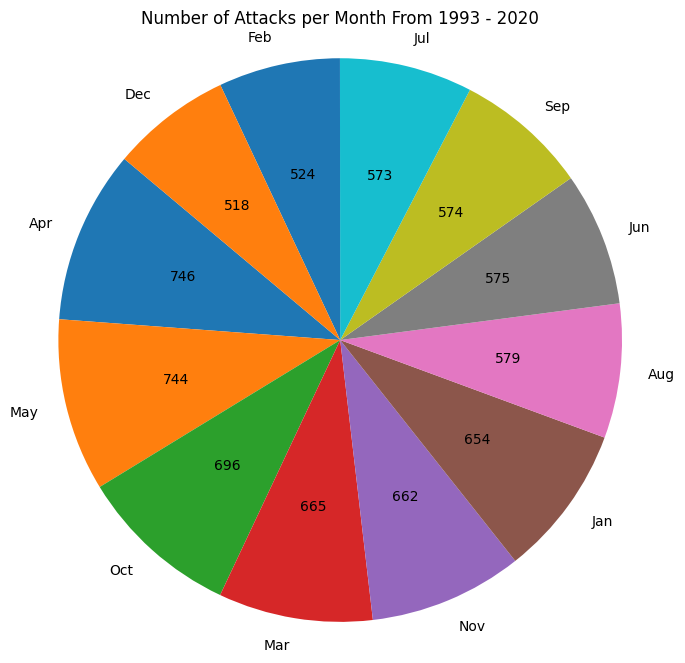

In [ ]:
#Create pie chart for attacks during month
import numpy
import calendar
#Extract month information from the 'date' column
Q_1_clean_df['month'] = Q_1_clean_df['date'].dt.month

#Calculate the number of attacks per month
monthly_attacks = Q_1_clean_df.groupby('month').size()

#Sort the months by the number of attacks in descending order
monthly_attacks_sorted = monthly_attacks.sort_values(ascending=False)

def absolute_value(val):
    a  = numpy.round(val/100.*monthly_attacks_sorted.sum(), 0)
    return int(a)

#Plot the number of attacks per month as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(monthly_attacks_sorted, labels=[calendar.month_abbr[i] for i in monthly_attacks_sorted.index], autopct= absolute_value, startangle=140)
plt.title('Number of Attacks per Month From 1993 - 2020')
plt.axis('equal')

plt.show()

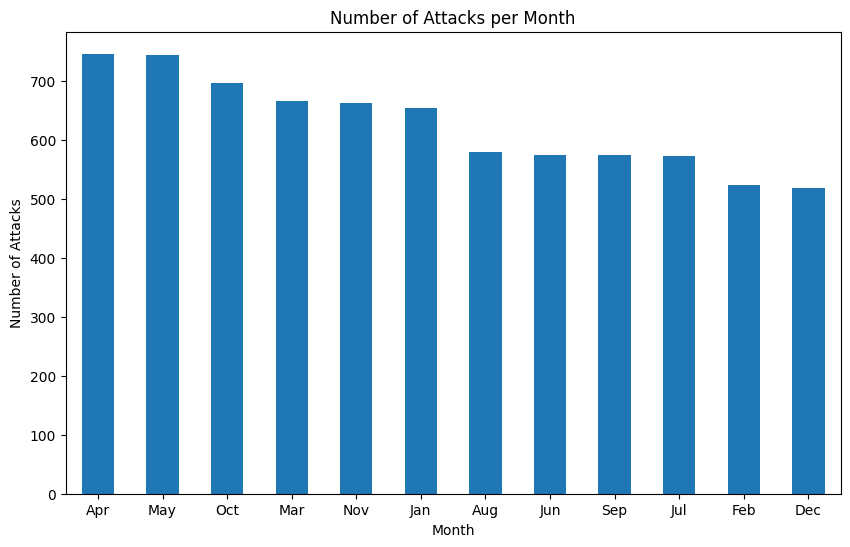

In [ ]:
import calendar

# Extract month information from the 'date' column
Q_1_clean_df['month'] = Q_1_clean_df['date'].dt.month

# Calculate the number of attacks per month
monthly_attacks = Q_1_clean_df.groupby('month').size()

# Sort the months by the number of attacks in descending order
monthly_attacks_sorted = monthly_attacks.sort_values(ascending=False)

# Plot the number of attacks per month
plt.figure(figsize=(10, 6))
monthly_attacks_sorted.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks per Month')

# Change the x-axis labels to three-letter month abbreviations
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i] for i in monthly_attacks_sorted.index], rotation=0)

plt.show()

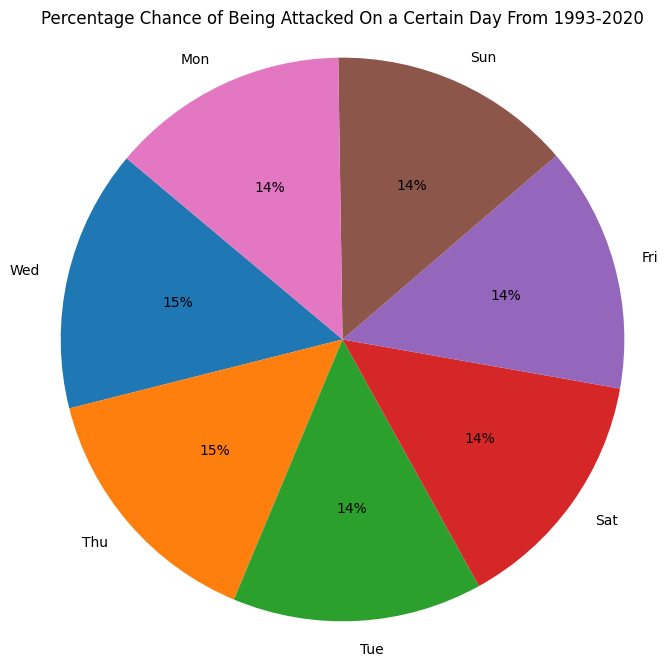

In [ ]:
import numpy
#Create pie chart for attacks during which day of the week

#Extract day of the week information from the 'date' column (0 = Monday, 6 = Sunday)
Q_1_clean_df['day_of_week'] = Q_1_clean_df['date'].dt.dayofweek

#Calculate the number of attacks per day of the week
weekly_attacks = Q_1_clean_df.groupby('day_of_week').size()

#Sort the days of the week by the number of attacks in descending order
weekly_attacks_sorted = weekly_attacks.sort_values(ascending=False)

def absolute_value(val):
    a  = numpy.round(val/100.*weekly_attacks_sorted.sum(), 0)
    return a

#Plot the number of attacks per day of the week as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weekly_attacks_sorted, labels=[calendar.day_abbr[i] for i in weekly_attacks_sorted.index], autopct= '%1.0f%%', startangle=140)
plt.title('Percentage Chance of Being Attacked On a Certain Day From 1993-2020')
plt.axis('equal')
plt.show()

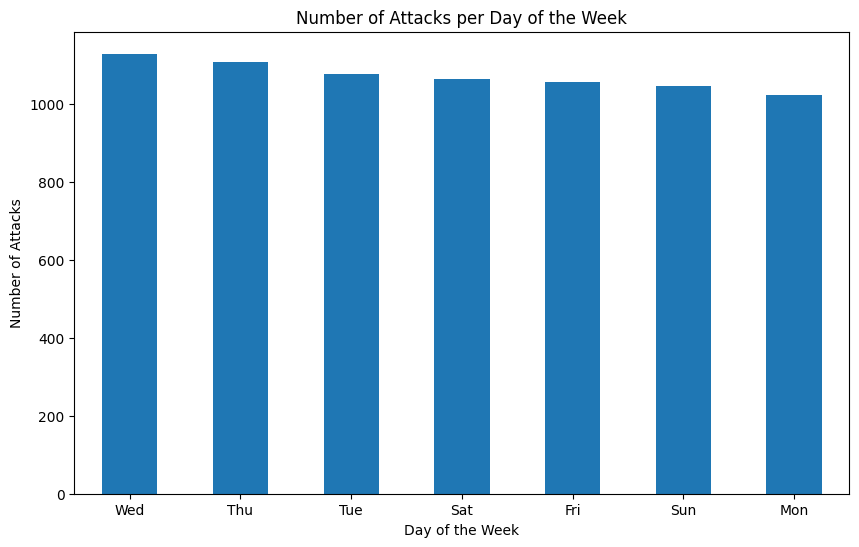

In [ ]:
# Extract day of the week information from the 'date' column (0 = Monday, 6 = Sunday)
Q_1_clean_df['day_of_week'] = Q_1_clean_df['date'].dt.dayofweek

# Calculate the number of attacks per day of the week
weekly_attacks = Q_1_clean_df.groupby('day_of_week').size()

# Sort the days of the week by the number of attacks in descending order
weekly_attacks_sorted = weekly_attacks.sort_values(ascending=False)

# Plot the number of attacks per day of the week
plt.figure(figsize=(10, 6))
weekly_attacks_sorted.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks per Day of the Week')

# Change the x-axis labels to three-letter day abbreviations
plt.xticks(ticks=range(7), labels=[calendar.day_abbr[i] for i in weekly_attacks_sorted.index], rotation=0)

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Conclusions:
1. top five/ten most likely areas(region/country) for attack?
- Prominent outlier of Indonesia taking the cake as the country with the most pirate attacks
- Most attacks did end up around the Indian Ocean near Southeast Asian and African countries that bordered the ocean
2. what time of day/month/year do attacks occur?
- We found that the most attacks occurred before the summer time because of the weather but we could not come to a definite conclusion in correlation with the weather and other specific factors

3. how far from shore to avoid attack?

Conclusions:
1. top five/ten most likely areas(region/country) for attack?
- Prominent outlier of Indonesia taking the cake as the country with the most pirate attacks
- Most attacks did end up around the Indian Ocean near Southeast Asian and African countries that bordered the ocean
2. what time of day/month/year do attacks occur?
- We found that the most attacks occurred before the summer time because of the weather
- we could not come to a definite conclusion in correlation with the weather and other specific factors like the products being targeted from specific countries, when the market was doing well and if that effected targeting more frequently, and other aspects behind the reasoning of attacking at a certain point in time

3. how far from shore to avoid attack?
- With our charts there was a lot to unbox and had many different data points that overlapped, so coming to a conclusion of a definite range was a little difficult but we had come to a general consensus as mentioned from the graph above that roughly ~50 miles off shore would be a good enough distance, but if you wanted to be even safer we had another line visualizing an extra safe distance from being attacked at roughly ~100 miles off shore


